# Setup

In [1]:
from Plotting.Spectrogram import plot_spectrogram_on_axis
from SigMFSampleSequence import load_sigmf_sequence
from matplotlib import pyplot as plt
from matplotlib.axes import Axes

## Configurations ##
# Filenames of the SigMF recordings to load.
filenames = [    "D:\\BoxFan-RX-Recording-PureTone-1KHz-Cosine-2.4GHz-1",
    "D:\\BoxFan-RX-Recording-PureTone-1KHz-Cosine-2.4GHz-1",
]
# Titles for the spectrograms (one per filename).
plot_titles = ["Sample Spectrogram - Segment 0", "Sample Spectrogram - Segment 1"]
# Time bounds
start_time = 0e-6 # seconds
end_time = 30000e-6 # seconds
# Frequency bounds (in Hz).
min_freq = 2440e6
max_freq = 2460e6
# Power bounds (for ensuring that colors have consistent meaning across plots).
min_power = -200 # dB. Set to ensure consistency across recordings.
max_power = 20 # dB. Set to ensure consistency across recordings.


# Load the recordings.
sigmf_recordings = []
for filename in filenames:
    sigmf_recordings.append(load_sigmf_sequence(filename, t_start=start_time, t_end=end_time))


# Computing FFTs

In [2]:
for recording in sigmf_recordings:
    recording.compute_segment_ffts(n_fft=8192, window_type="hamming", debug=False)


/media/daniel-mayer/Inter-System-Files/CMU-Research/Ares-IQ/GNURadio/Visualization/.venv/lib/python3.12/site-packages/jax/_src/numpy/scalar_types.py:50: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
/media/daniel-mayer/Inter-System-Files/CMU-Research/Ares-IQ/GNURadio/Visualization/.venv/lib/python3.12/site-packages/jax/_src/numpy/lax_numpy.py:5946: UserWarning: Explicitly requested dtype int64 requested in arange is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return _arange(start, stop=stop, step=step, dtype=dtype,

# Generating the Spectrograms

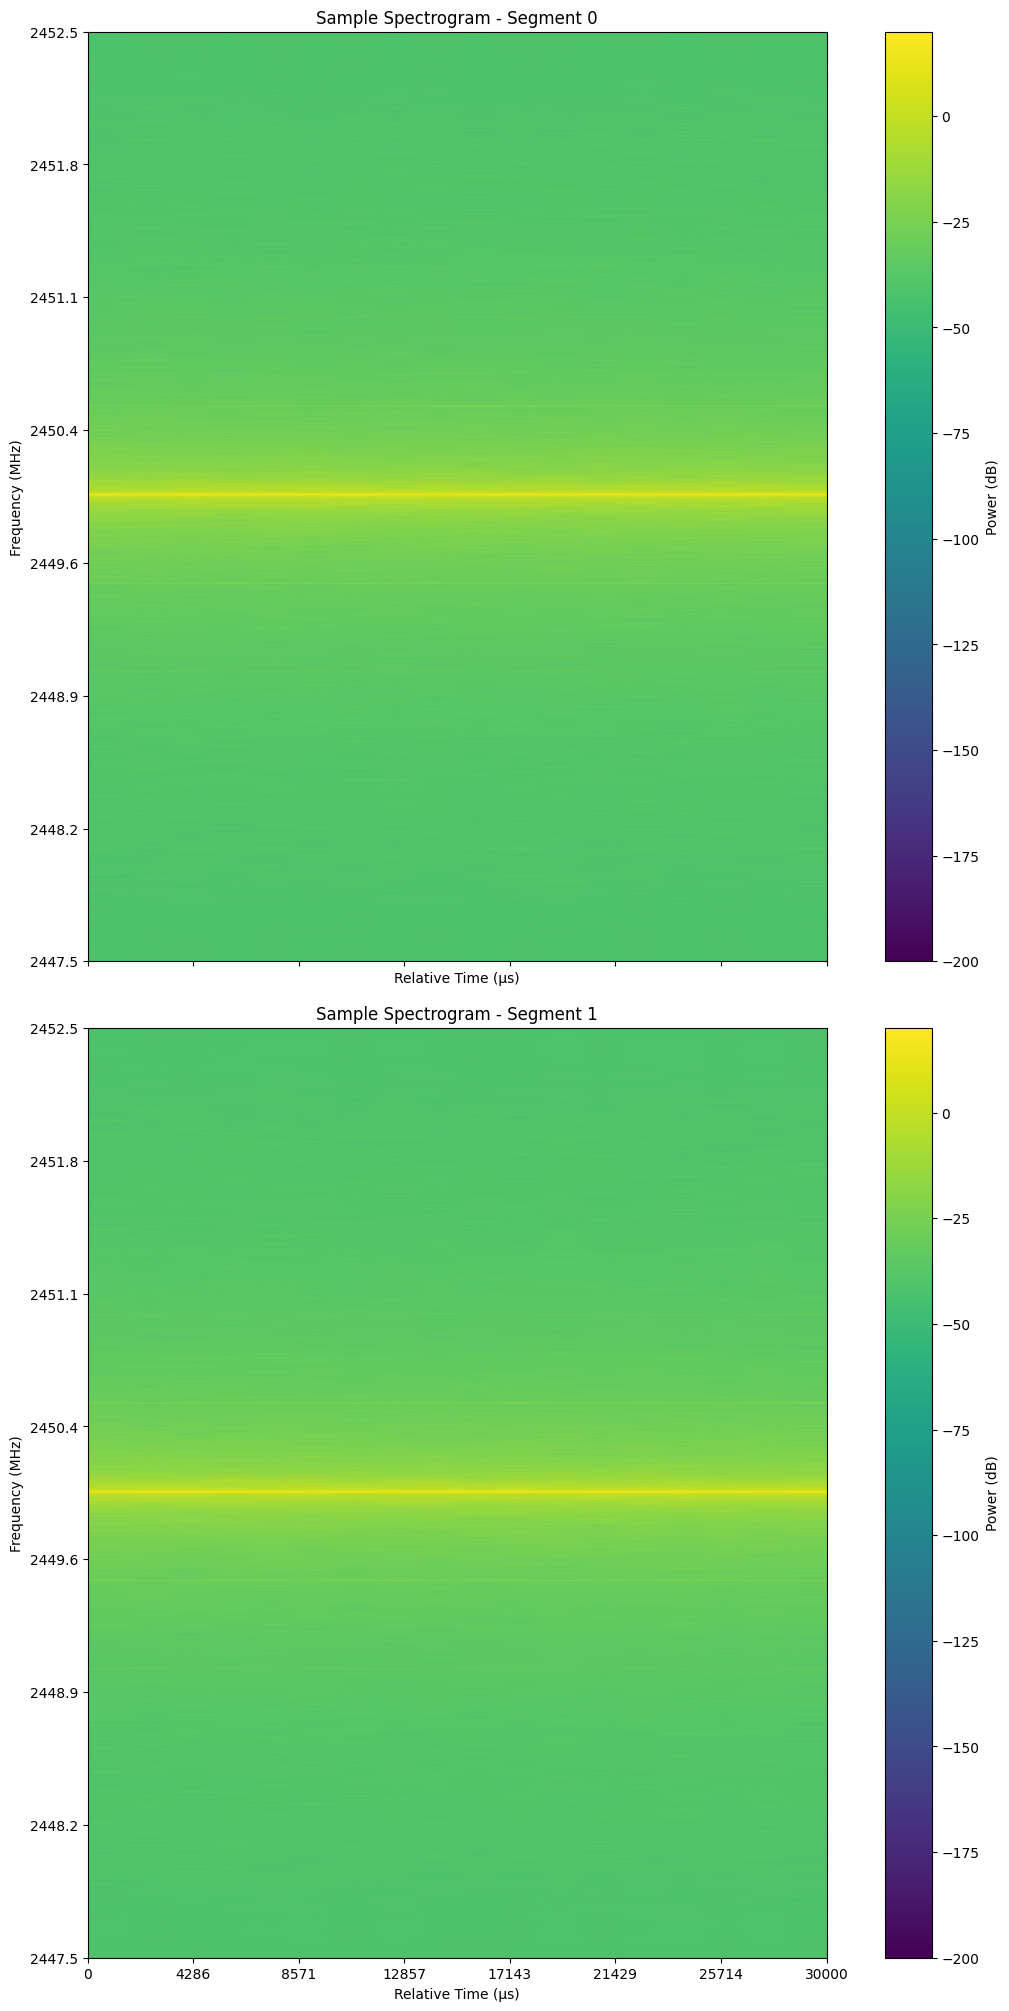

In [3]:

# Initialize a figure.
fig, axes = plt.subplots(len(sigmf_recordings), 1, figsize = (10, 20), sharex = "col", constrained_layout = True)

# Generate spectrograms.
for i in range(0, len(sigmf_recordings)):
    if isinstance(axes, Axes):
        recording_axes = axes
    else:
        recording_axes = axes[i]
    plot_spectrogram_on_axis(recording_axes, sigmf_recordings[i], start_time, end_time, min_freq, max_freq, min_power, max_power, time_unit="us", freq_unit="MHz",
                             show_xlabel=True, show_ylabel=True, show_colorbar=True, show_title=True, title=plot_titles[i])


plt.show()